In [19]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic3"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import load_demograhics, load_buurt_data, willingness_to_cycle, add_willingness_to_cycle_column, punt_buurt_code_column

In [30]:
mode = "fiets"
punt1 = "hbo_wo"
location = "Universities"

df_demographics = load_demograhics()
df_punt = load_buurt_data(punt1, mode=mode)

Loaded file from CSV


In [32]:
df_punt.describe()

,reistijd_min,reisafstand_m,afstand_hemelsbreed_m,omrijdfactor
count,69073.000000,69073.000000,69073.000000,69073.000000
mean,66.820625,18998.672636,15967.021861,1.199625
std,33.558577,8835.480975,7433.409916,0.087643
min,0.000000,86.000000,76.000000,1.000000
25%,41.000000,11615.000000,9740.000000,1.140000
50%,71.000000,20400.000000,17321.000000,1.190000
75%,92.000000,26478.000000,22313.000000,1.240000
max,830.000000,44301.000000,27115.000000,3.560000


In [28]:
df_punt[punt_buurt_code_column].unique()

array(['BU04390502', 'BU04390201', 'BU04390202', ..., 'BU19492500',
       'BU19494200', 'BU19492801'], shape=(11784,), dtype=object)

Demographics and filtered dataframes do not match in length: 11783 vs 11784, ignoring missing values


c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\codebase\plotting\plots.py:84: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right', fontsize='small')
c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\codebase\plotting\plots.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small')


<Figure size 1000x1000 with 0 Axes>

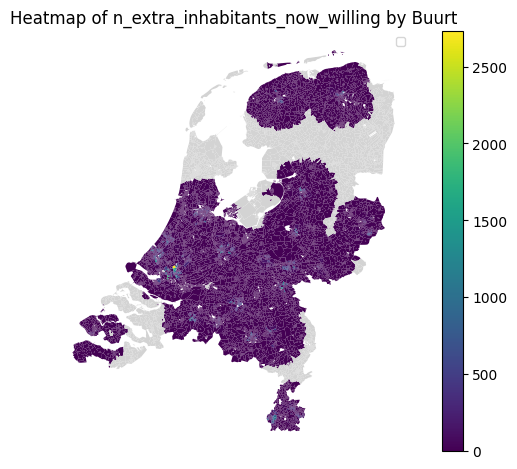

In [33]:
from codebase import calculate_added_willingness, demographics_a_15_24
improvement_column="n_extra_inhabitants_now_willing"
df_with_willingness = calculate_added_willingness(
    df_punt, 
    df_demographics,
    mode=mode,
    location=location,
    detour_max=1.2,
    detour_reduction=0.8,
    improvement_column=improvement_column,
    age_group_column=None,
    # col_to_plot="reistijd_min_new"
)

In [24]:
df_punt.isna().sum()

basisschool_id           0
bu_code                  0
reistijd_min             0
reisafstand_m            0
afstand_hemelsbreed_m    0
omrijdfactor             0
dtype: int64

In [25]:
top_n = 10
df_with_willingness.sort_values(by=improvement_column, ascending=False)[["bu_code", improvement_column]][:top_n]

,bu_code,n_extra_inhabitants_now_willing
6986,BU05991289,904
6453,BU05181697,840
7008,BU05991699,716
8008,BU07580200,633
5559,BU04390204,530
6971,BU05990842,514
509,BU00740406,497
1452,BU01530406,476
3901,BU03441022,458
4302,BU0363ED03,426
